In [5]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [4]:
pip install wordcloud



     ------------------------------------ 153.3/153.3 kB 127.2 kB/s eta 0:00:00


In [6]:
data=pd.read_excel(r"C:\Users\HP\Dropbox\MSCBA_THIRD_SEM\MINOR_PROJECT\youtube_comments (3).xlsx")
data

,Username,Likes,Comment Date,Comment
0,xxxyyyzzzaaa,0,2023-10-23T18:41:47Z,Thank you for free advice.
1,Glória,0,2023-10-05T17:28:12Z,A friend of mine is at the hospital almost dea...
2,Robert Harvey,2,2023-09-28T13:10:11Z,"nicotine is not that harmful, its the smoke th..."
3,namapro,1,2023-09-24T09:45:32Z,"Pure vape contains no more than 2 substances, ..."
4,Danish Soomro,0,2023-09-22T02:36:36Z,Seems like I know more than Doctor
...,...,...,...,...
71,Kandy,3,2022-12-29T20:22:16Z,Really good and informative video.
72,khurram khan,0,2022-12-06T09:47:29Z,Your research is stupid .Vaping is 95% less ha...
73,Badaa Saab,0,2022-12-01T07:26:49Z,https://youtu.be/7PT1TRo3b4M \n\nSuggest that ...
74,MagentaFlareQ,82,2022-12-01T02:44:52Z,"But nicotine isn't at all that harmfull, it is..."


In [7]:
df=data["Comment"]
df=pd.DataFrame(df)
df

,Comment
0,Thank you for free advice.
1,A friend of mine is at the hospital almost dea...
2,"nicotine is not that harmful, its the smoke th..."
3,"Pure vape contains no more than 2 substances, ..."
4,Seems like I know more than Doctor
...,...
71,Really good and informative video.
72,Your research is stupid .Vaping is 95% less ha...
73,https://youtu.be/7PT1TRo3b4M \n\nSuggest that ...
74,"But nicotine isn't at all that harmfull, it is..."


In [8]:
def clean_youtube_comments(comment):
    # Remove URLs
    comment = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', comment)
    
    # Remove special characters, hashtags, and mentions
    comment = re.sub(r'[^A-Za-z0-9 ]+', ' ', comment)
    
    # Remove extra whitespaces
    comment = ' '.join(comment.split())
    
    return comment

In [9]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [10]:
df['cleaned_comment'] = df['Comment'].apply(clean_youtube_comments)

# Display the cleaned dataframe
df

,Comment,cleaned_comment
0,Thank you for free advice.,Thank you for free advice
1,A friend of mine is at the hospital almost dea...,A friend of mine is at the hospital almost dea...
2,"nicotine is not that harmful, its the smoke th...",nicotine is not that harmful its the smoke tha...
3,"Pure vape contains no more than 2 substances, ...",Pure vape contains no more than 2 substances p...
4,Seems like I know more than Doctor,Seems like I know more than Doctor
...,...,...
71,Really good and informative video.,Really good and informative video
72,Your research is stupid .Vaping is 95% less ha...,Your research is stupid Vaping is 95 less harm...
73,https://youtu.be/7PT1TRo3b4M \n\nSuggest that ...,Suggest that you view this video to get a bala...
74,"But nicotine isn't at all that harmfull, it is...",But nicotine isn t at all that harmfull it is ...


In [11]:
df['cleaned_comment_emoji'] = df['cleaned_comment'].apply(remove_emojis)

In [12]:
df

,Comment,cleaned_comment,cleaned_comment_emoji
0,Thank you for free advice.,Thank you for free advice,Thank you for free advice
1,A friend of mine is at the hospital almost dea...,A friend of mine is at the hospital almost dea...,A friend of mine is at the hospital almost dea...
2,"nicotine is not that harmful, its the smoke th...",nicotine is not that harmful its the smoke tha...,nicotine is not that harmful its the smoke tha...
3,"Pure vape contains no more than 2 substances, ...",Pure vape contains no more than 2 substances p...,Pure vape contains no more than 2 substances p...
4,Seems like I know more than Doctor,Seems like I know more than Doctor,Seems like I know more than Doctor
...,...,...,...
71,Really good and informative video.,Really good and informative video,Really good and informative video
72,Your research is stupid .Vaping is 95% less ha...,Your research is stupid Vaping is 95 less harm...,Your research is stupid Vaping is 95 less harm...
73,https://youtu.be/7PT1TRo3b4M \n\nSuggest that ...,Suggest that you view this video to get a bala...,Suggest that you view this video to get a bala...
74,"But nicotine isn't at all that harmfull, it is...",But nicotine isn t at all that harmfull it is ...,But nicotine isn t at all that harmfull it is ...


In [13]:
import pandas as pd
from langdetect import detect

In [14]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False


In [15]:
english_mask = df['cleaned_comment_emoji'].apply(is_english)

In [16]:
df_english_only = english_mask

In [17]:
df_english_only.value_counts()

True     67
False     9
Name: cleaned_comment_emoji, dtype: int64

In [18]:
# Concatenate all text from the 'text' column
text_data = ' '.join(df['cleaned_comment'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text_data)


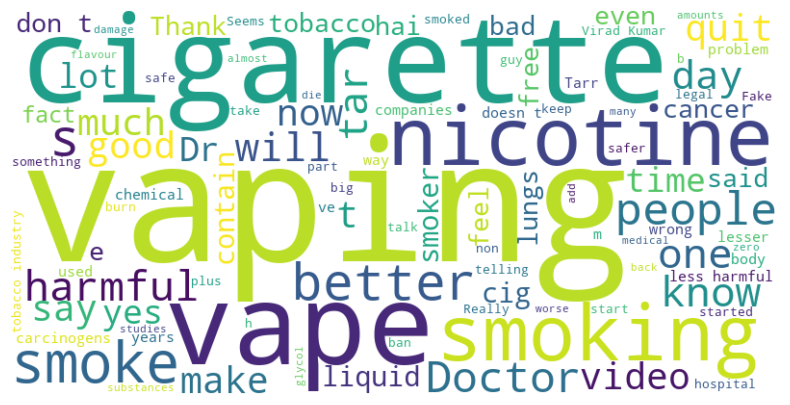

In [19]:
# Display the Word Cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
